# PyTorch version of deeplearning.ai Course 1 Week 4 PA 2

---

## Cat or not-cat classification PyTorch Version

In [5]:
import torch
from torch.autograd import Variable
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [6]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


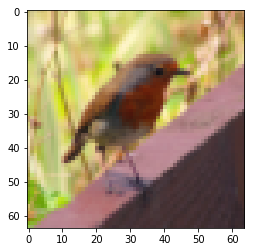

In [7]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [8]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [9]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [10]:
train_x.shape

(12288, 209)

iteration: 0, loss: 0.668708324432373
iteration: 100, loss: 0.6467249989509583
iteration: 200, loss: 0.6341793537139893
iteration: 300, loss: 0.6177632212638855
iteration: 400, loss: 0.5932557582855225
iteration: 500, loss: 0.5593360066413879
iteration: 600, loss: 0.5151419639587402
iteration: 700, loss: 0.4554378092288971
iteration: 800, loss: 0.44626957178115845
iteration: 900, loss: 0.4164860248565674
iteration: 1000, loss: 0.3851222097873688
iteration: 1100, loss: 0.34968292713165283
iteration: 1200, loss: 0.2551746666431427
iteration: 1300, loss: 0.20076347887516022
iteration: 1400, loss: 0.16667208075523376
iteration: 1500, loss: 0.16551198065280914
iteration: 1600, loss: 0.09510821104049683
iteration: 1700, loss: 0.07362847030162811
iteration: 1800, loss: 0.0503259152173996
iteration: 1900, loss: 0.034205611795186996
iteration: 2000, loss: 0.02515435591340065
iteration: 2100, loss: 0.01924746483564377
iteration: 2200, loss: 0.015164634212851524
iteration: 2300, loss: 0.012280004

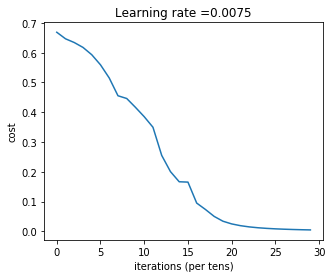

In [13]:


model = torch.nn.Sequential(
          torch.nn.Linear(12288, 20),
          torch.nn.ReLU(),
          torch.nn.Linear(20, 7),
          torch.nn.ReLU(),
          torch.nn.Linear(7, 5),
          torch.nn.ReLU(),
          torch.nn.Linear(5, 1),
          torch.nn.Sigmoid()
        )


loss_fn = torch.nn.BCELoss()

x = Variable(torch.from_numpy(train_x.T).float())
y = Variable(torch.from_numpy(train_y.T).float(), requires_grad=False)


learning_rate = 0.0075
costs = []

for t in range(3000):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)

    if t % 100 == 0:
        print("iteration: " + str(t) + ", loss: " + str(loss.data.item()))
        costs.append(loss.data.item())
    
    model.zero_grad()
    
    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data


plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

(12288, 50)
y = 0.9126595. It's a cat picture.


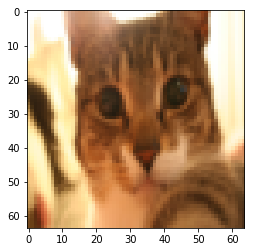

In [71]:
index = 11
print(test_x.shape)
y_pred = model(Variable(torch.from_numpy(test_x.T[index]).float()))

plt.imshow(test_x_orig[index])
print ("y = " + str(y_pred.data.numpy()[0]) + ". It's a " + classes[test_y[0,index]].decode("utf-8") +  " picture.")